# Teste para vaga analista de dados


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

## Tratamentos dos dados
carregando dados

In [3]:
df=pd.read_excel(R'C:\Users\Anderson Salata\Documents\Testes Analista Dados Sr\Case_Formatura.xlsx')

In [4]:
df.head(5)

,COD_ALUNO,COD_UNIDADE,COD_TURMA,SEXO,ESTADO_CIVIL,DATA_NASCIMENTO,CIDADE_ALUNO,UF_ALUNO,CEP_ALUNO,COD_CURSO,...,NR_DISC_APROVADA,T_IDADE,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS,POSSUI_FIES
0,1000055,508,316720151A,2,S,1996-11-19 00:00:00,BETIM,MG,32.661-750,3167,...,27,21,8.711111,537.575,1,NaN,NaN,NaN,4,SIM
1,1000143,550,9917120151A,2,S,1996-09-03 23:00:00,APUCARANA,PR,86.801-040,99171,...,30,21,8.140000,421.000,1,NaN,NaN,NaN,4,NAO
2,1000179,1,80820151A,2,S,1950-06-29 23:00:00,CUIABÁ,MT,78.065-900,808,...,30,67,8.510000,NaN,0,NaN,NaN,NaN,4,NAO
3,1000210,1,80820151A,2,C,1981-11-23 23:00:00,POCONÉ,MT,78.175-000,808,...,30,36,8.456667,NaN,0,NaN,NaN,NaN,4,SIM
4,1000228,6,52220112A,1,S,1979-12-29 23:00:00,SALVADOR,BA,41.250-470,522,...,50,37,7.624490,NaN,0,43.0,48.0,5.0,14,NAO


In [5]:
df.shape

(68826, 29)

In [6]:
df.dtypes

COD_ALUNO                 int64
COD_UNIDADE               int64
COD_TURMA                object
SEXO                      int64
ESTADO_CIVIL             object
DATA_NASCIMENTO          object
CIDADE_ALUNO             object
UF_ALUNO                 object
CEP_ALUNO                object
COD_CURSO                 int64
NOME_CURSO               object
TURNO_CURSO               int64
DURACAO_CURSO             int64
SITUCAO_MATRICULA        object
DATA_CONCLUSAO           object
PERIODOS_TRANCADOS        int64
CH_TOTAL_MATRIZ           int64
NR_TOTAL_DISCIPLINAS      int64
CH_APROVADA               int64
NR_DISC_APROVADA          int64
T_IDADE                   int64
NOTA                    float64
NOTA_ENEM               float64
POSSUI_ENEM               int64
NRO_REPRO_ACO           float64
NRO_TOTAL_REPRO         float64
NRO_REPRO_NORMAL        float64
SEMESTRES_CURSADOS        int64
POSSUI_FIES              object
dtype: object

In [7]:
df.sample(3).T
#conferindo a importação dos dados.

,66279,28177,22995
COD_ALUNO,934687,454384,405881
COD_UNIDADE,1,1,513
COD_TURMA,109520152A,135620121A,6748720112
SEXO,1,2,1
ESTADO_CIVIL,S,C,S
DATA_NASCIMENTO,1997-08-19 23:00:00,1960-07-19 23:00:00,1983-03-23 23:00:00
CIDADE_ALUNO,CUIABÁ,CUIABÁ,DIVINÓPOLIS
UF_ALUNO,MT,MT,MG
CEP_ALUNO,78.050-040,78.055-000,35.501-281
COD_CURSO,1095,1356,67487


### Conhecendo os dados

In [8]:
df.info()
#verificando os tipos de variáveis existentes no banco de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68826 entries, 0 to 68825
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COD_ALUNO             68826 non-null  int64  
 1   COD_UNIDADE           68826 non-null  int64  
 2   COD_TURMA             68826 non-null  object 
 3   SEXO                  68826 non-null  int64  
 4   ESTADO_CIVIL          68826 non-null  object 
 5   DATA_NASCIMENTO       68826 non-null  object 
 6   CIDADE_ALUNO          68826 non-null  object 
 7   UF_ALUNO              68822 non-null  object 
 8   CEP_ALUNO             68826 non-null  object 
 9   COD_CURSO             68826 non-null  int64  
 10  NOME_CURSO            68826 non-null  object 
 11  TURNO_CURSO           68826 non-null  int64  
 12  DURACAO_CURSO         68826 non-null  int64  
 13  SITUCAO_MATRICULA     68826 non-null  object 
 14  DATA_CONCLUSAO        68826 non-null  object 
 15  PERIODOS_TRANCADOS 

####

In [9]:
df.columns.values


array(['COD_ALUNO', 'COD_UNIDADE', 'COD_TURMA', 'SEXO', 'ESTADO_CIVIL',
       'DATA_NASCIMENTO', 'CIDADE_ALUNO', 'UF_ALUNO', 'CEP_ALUNO',
       'COD_CURSO', 'NOME_CURSO', 'TURNO_CURSO', 'DURACAO_CURSO',
       'SITUCAO_MATRICULA', 'DATA_CONCLUSAO', 'PERIODOS_TRANCADOS',
       'CH_TOTAL_MATRIZ', 'NR_TOTAL_DISCIPLINAS', 'CH_APROVADA',
       'NR_DISC_APROVADA', 'T_IDADE', 'NOTA', 'NOTA_ENEM', 'POSSUI_ENEM',
       'NRO_REPRO_ACO', 'NRO_TOTAL_REPRO', 'NRO_REPRO_NORMAL',
       'SEMESTRES_CURSADOS', 'POSSUI_FIES'], dtype=object)

In [10]:
df.corr().T
#conhecendo as correlações das variáveis do tipo inteiro.

,COD_ALUNO,COD_UNIDADE,SEXO,COD_CURSO,TURNO_CURSO,DURACAO_CURSO,PERIODOS_TRANCADOS,CH_TOTAL_MATRIZ,NR_TOTAL_DISCIPLINAS,CH_APROVADA,NR_DISC_APROVADA,T_IDADE,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS
COD_ALUNO,1.000000,-0.017537,-0.015254,-0.170081,0.073950,-0.184280,-0.047297,-0.205748,-0.166476,-0.205374,-0.166111,0.029181,0.079689,-0.044882,0.144720,-0.008124,-0.015831,-0.026626,-0.075669
COD_UNIDADE,-0.017537,1.000000,-0.102092,0.887673,0.206036,-0.043708,-0.023068,-0.107250,-0.031640,-0.108314,-0.033086,-0.030578,-0.113781,0.121998,-0.040707,-0.102713,-0.111095,-0.068551,-0.064741
SEXO,-0.015254,-0.102092,1.000000,-0.093982,-0.101802,-0.044520,-0.022952,0.008579,-0.078879,0.008874,-0.078351,-0.036046,0.101507,-0.211729,0.014264,-0.030389,-0.052127,-0.078249,-0.077461
COD_CURSO,-0.170081,0.887673,-0.093982,1.000000,0.190547,-0.051854,-0.015498,-0.103923,-0.032490,-0.104997,-0.033812,-0.055940,-0.111934,0.109097,-0.055041,-0.129059,-0.133325,-0.067274,-0.084508
TURNO_CURSO,0.073950,0.206036,-0.101802,0.190547,1.000000,-0.158526,-0.005389,-0.229394,-0.141098,-0.229328,-0.141409,0.068841,-0.024015,-0.035819,0.016467,-0.035558,-0.051361,-0.062565,-0.080041
DURACAO_CURSO,-0.184280,-0.043708,-0.044520,-0.051854,-0.158526,1.000000,0.030573,0.874795,0.897436,0.872780,0.895399,-0.020012,-0.057183,0.228430,-0.123527,0.369550,0.379771,0.186624,0.740090
PERIODOS_TRANCADOS,-0.047297,-0.023068,-0.022952,-0.015498,-0.005389,0.030573,1.000000,0.033437,0.033117,0.031815,0.031570,0.038725,-0.088988,0.010443,-0.046666,0.033659,0.077357,0.145727,0.235154
CH_TOTAL_MATRIZ,-0.205748,-0.107250,0.008579,-0.103923,-0.229394,0.874795,0.033437,1.000000,0.776458,0.997631,0.774577,-0.014969,-0.097076,0.187058,-0.147628,0.269214,0.291111,0.179451,0.666306
NR_TOTAL_DISCIPLINAS,-0.166476,-0.031640,-0.078879,-0.032490,-0.141098,0.897436,0.033117,0.776458,1.000000,0.775094,0.997920,-0.013945,-0.064466,0.227470,-0.118745,0.308221,0.329039,0.192657,0.677726
CH_APROVADA,-0.205374,-0.108314,0.008874,-0.104997,-0.229328,0.872780,0.031815,0.997631,0.775094,1.000000,0.777522,-0.015840,-0.094471,0.187059,-0.146215,0.269660,0.290919,0.177722,0.663363


#### Medidas Básicas do DataSet

In [11]:
pd.options.display.float_format = "{:.3f}".format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COD_ALUNO,68826.000,538746.896,247876.337,2128.000,360012.250,496888.000,711161.750,1265826.000
COD_UNIDADE,68826.000,342.769,251.568,1.000,8.000,508.000,535.000,703.000
SEXO,68826.000,1.610,0.488,1.000,1.000,2.000,2.000,2.000
COD_CURSO,68826.000,49887.698,39651.885,1.000,831.000,67556.000,69096.500,99380.000
TURNO_CURSO,68826.000,2.490,1.083,0.000,3.000,3.000,3.000,3.000
DURACAO_CURSO,68826.000,8.029,2.065,4.000,8.000,8.000,10.000,12.000
PERIODOS_TRANCADOS,68826.000,0.052,0.286,0.000,0.000,0.000,0.000,15.000
CH_TOTAL_MATRIZ,68826.000,3188.443,869.658,0.000,2910.000,3200.000,3700.000,8764.000
NR_TOTAL_DISCIPLINAS,68826.000,51.830,13.775,0.000,45.000,51.000,63.000,83.000
CH_APROVADA,68826.000,3185.062,871.408,0.000,2900.000,3200.000,3700.000,8764.000


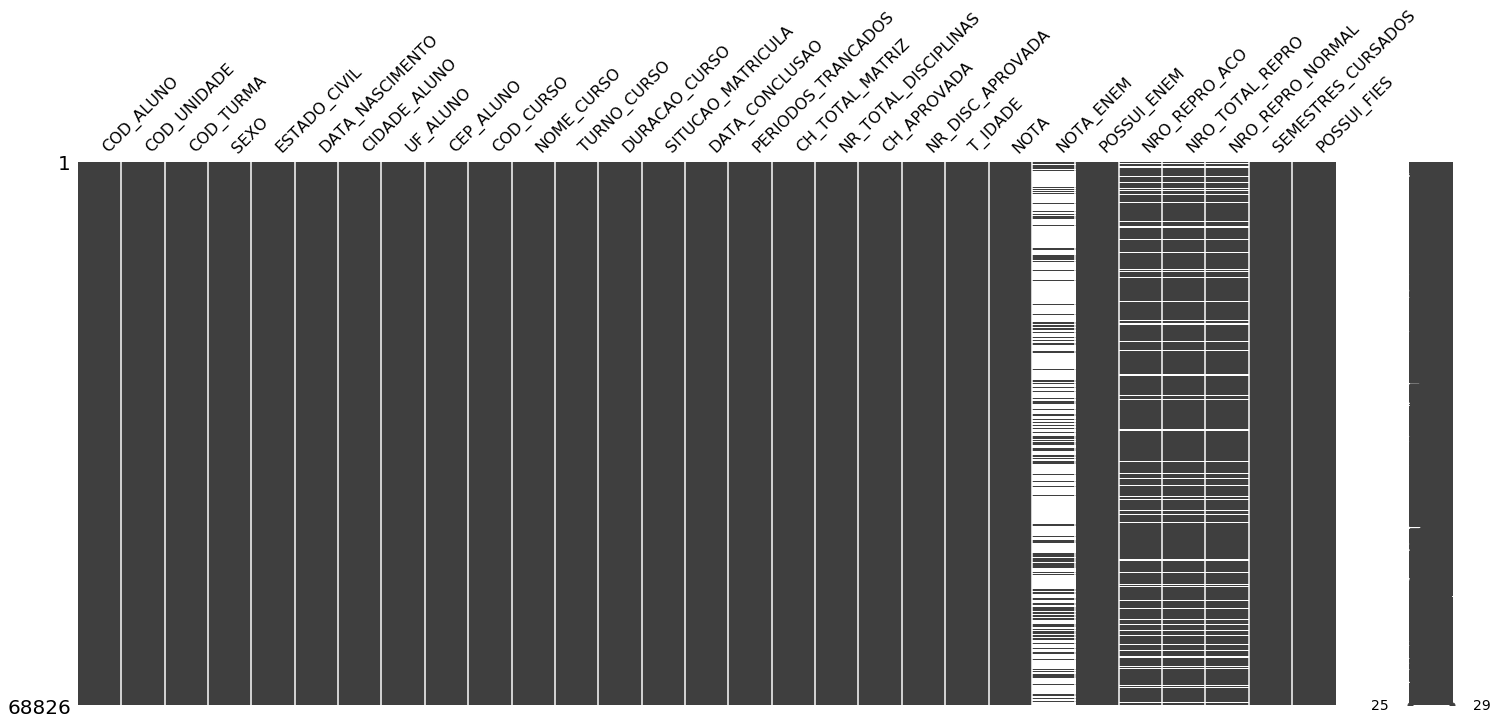

In [12]:
msno.matrix(df)
#usando a matrix para analisar dados em brancos e possíveis erros.

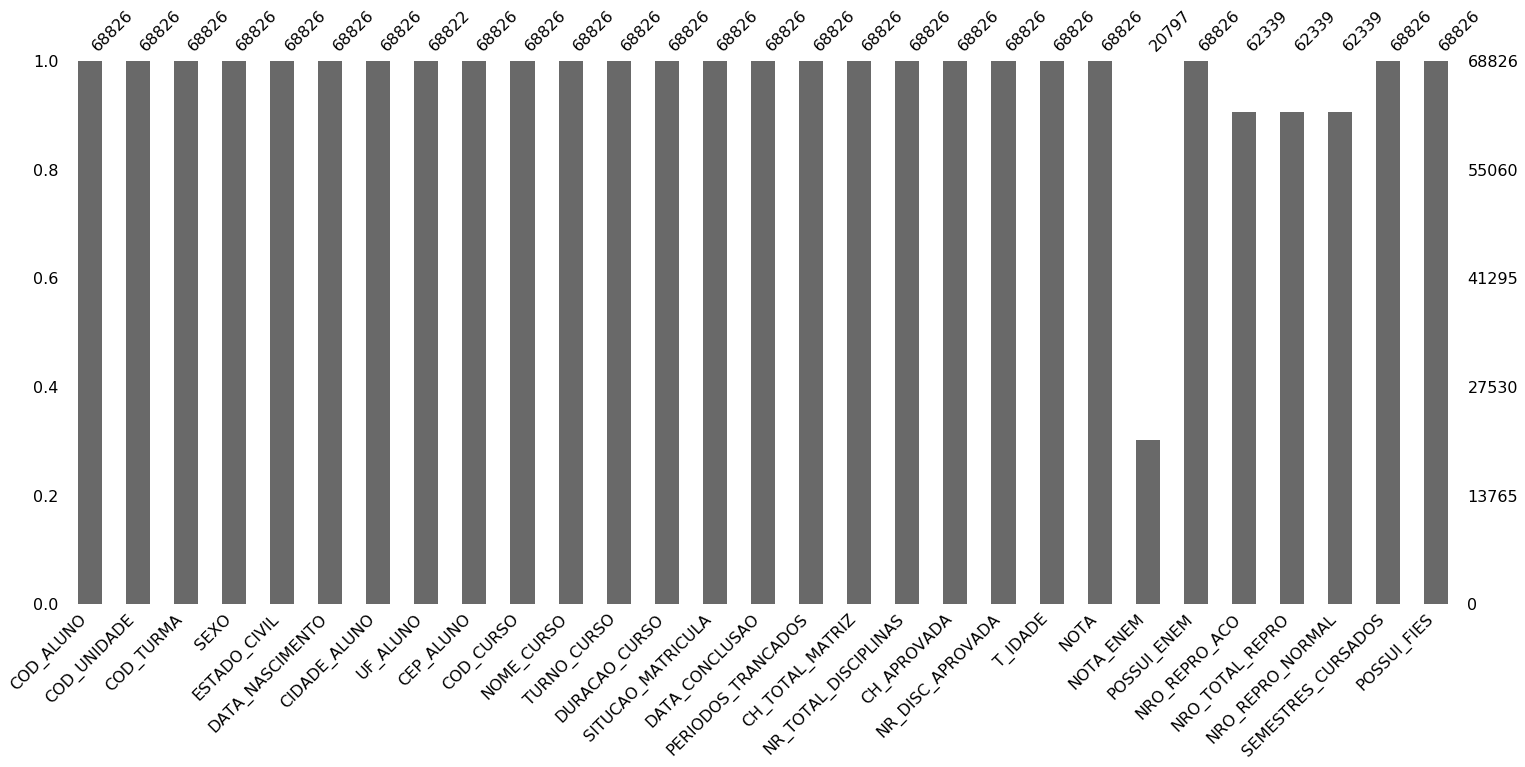

In [13]:
msno.bar(df)
#outra forma de visualização dos dados faltantes.

In [14]:
#df['NOTA_ENEM'] = 
pd.to_numeric(df.NOTA_ENEM, errors='coerce')
df.isnull().sum()

COD_ALUNO                   0
COD_UNIDADE                 0
COD_TURMA                   0
SEXO                        0
ESTADO_CIVIL                0
DATA_NASCIMENTO             0
CIDADE_ALUNO                0
UF_ALUNO                    4
CEP_ALUNO                   0
COD_CURSO                   0
NOME_CURSO                  0
TURNO_CURSO                 0
DURACAO_CURSO               0
SITUCAO_MATRICULA           0
DATA_CONCLUSAO              0
PERIODOS_TRANCADOS          0
CH_TOTAL_MATRIZ             0
NR_TOTAL_DISCIPLINAS        0
CH_APROVADA                 0
NR_DISC_APROVADA            0
T_IDADE                     0
NOTA                        0
NOTA_ENEM               48029
POSSUI_ENEM                 0
NRO_REPRO_ACO            6487
NRO_TOTAL_REPRO          6487
NRO_REPRO_NORMAL         6487
SEMESTRES_CURSADOS          0
POSSUI_FIES                 0
dtype: int64

In [15]:
df.isna().mean()

COD_ALUNO              0.000
COD_UNIDADE            0.000
COD_TURMA              0.000
SEXO                   0.000
ESTADO_CIVIL           0.000
DATA_NASCIMENTO        0.000
CIDADE_ALUNO           0.000
UF_ALUNO               0.000
CEP_ALUNO              0.000
COD_CURSO              0.000
NOME_CURSO             0.000
TURNO_CURSO            0.000
DURACAO_CURSO          0.000
SITUCAO_MATRICULA      0.000
DATA_CONCLUSAO         0.000
PERIODOS_TRANCADOS     0.000
CH_TOTAL_MATRIZ        0.000
NR_TOTAL_DISCIPLINAS   0.000
CH_APROVADA            0.000
NR_DISC_APROVADA       0.000
T_IDADE                0.000
NOTA                   0.000
NOTA_ENEM              0.698
POSSUI_ENEM            0.000
NRO_REPRO_ACO          0.094
NRO_TOTAL_REPRO        0.094
NRO_REPRO_NORMAL       0.094
SEMESTRES_CURSADOS     0.000
POSSUI_FIES            0.000
dtype: float64

In [16]:
df=df.fillna(value=0)
#Observe que os dados faltantes na coluna NOTA_ENEM serão categorizados a partir de agora com a nota=0, o mesmo se aplica para as outras 3 colunas com dados faltantes.

In [17]:
df.isna().mean()

COD_ALUNO              0.000
COD_UNIDADE            0.000
COD_TURMA              0.000
SEXO                   0.000
ESTADO_CIVIL           0.000
DATA_NASCIMENTO        0.000
CIDADE_ALUNO           0.000
UF_ALUNO               0.000
CEP_ALUNO              0.000
COD_CURSO              0.000
NOME_CURSO             0.000
TURNO_CURSO            0.000
DURACAO_CURSO          0.000
SITUCAO_MATRICULA      0.000
DATA_CONCLUSAO         0.000
PERIODOS_TRANCADOS     0.000
CH_TOTAL_MATRIZ        0.000
NR_TOTAL_DISCIPLINAS   0.000
CH_APROVADA            0.000
NR_DISC_APROVADA       0.000
T_IDADE                0.000
NOTA                   0.000
NOTA_ENEM              0.000
POSSUI_ENEM            0.000
NRO_REPRO_ACO          0.000
NRO_TOTAL_REPRO        0.000
NRO_REPRO_NORMAL       0.000
SEMESTRES_CURSADOS     0.000
POSSUI_FIES            0.000
dtype: float64

In [121]:
#df["POSSUI_FIES"]= df["POSSUI_FIES"].replace({'SIM':1 ,'NAO':0})
#df.head()
df['POSSUI_FIES'] = pd.to_numeric(df['POSSUI_FIES'], errors='coerce', downcast ='integer')
#substituiremos na coluna "POSSUI FIES" o valor categórico pelo valor númerico.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68790 entries, 0 to 68825
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   COD_ALUNO             68790 non-null  int64   
 1   COD_UNIDADE           68790 non-null  int64   
 2   COD_TURMA             68790 non-null  object  
 3   SEXO                  68790 non-null  int64   
 4   ESTADO_CIVIL          68790 non-null  object  
 5   DATA_NASCIMENTO       68790 non-null  object  
 6   CIDADE_ALUNO          68790 non-null  object  
 7   UF_ALUNO              68790 non-null  object  
 8   CEP_ALUNO             68790 non-null  object  
 9   COD_CURSO             68790 non-null  int64   
 10  NOME_CURSO            68790 non-null  category
 11  TURNO_CURSO           68790 non-null  int64   
 12  DURACAO_CURSO         68790 non-null  int64   
 13  SITUCAO_MATRICULA     68790 non-null  object  
 14  DATA_CONCLUSAO        68790 non-null  object  
 15  PE

In [128]:
df['NOME_CURSO'].unique()

[CST em Gestão de Recursos Humanos - N, CST em Gastronomia - M, Administração - N, Fisioterapia (Not), CST em Redes de Computadores - N, ..., CST em Sistemas Para Internet (Mat), CST em Logística (Not), Administração- Administração de Negócios, Ciências Biológicas - Licenciatura (NOT), Educação Física]
Length: 235
Categories (235, object): [CST em Gestão de Recursos Humanos - N, CST em Gastronomia - M, Administração - N, Fisioterapia (Not), ..., CST em Logística (Not), Administração- Administração de Negócios, Ciências Biológicas - Licenciatura (NOT), Educação Física]

In [140]:
df['CIDADE_ALUNO'].unique()

array(['BETIM', 'APUCARANA', 'CUIABÁ', ..., 'DORES DO INDAIA',
       'BOM JESUS DO AMPARO', 'IBIPORÁ'], dtype=object)

In [154]:
df[(df['CIDADE_ALUNO'] == 'APUCARANA') & (df['COD_CURSO'] == 99171)]

,COD_ALUNO,COD_UNIDADE,COD_TURMA,SEXO,ESTADO_CIVIL,DATA_NASCIMENTO,CIDADE_ALUNO,UF_ALUNO,CEP_ALUNO,COD_CURSO,...,T_IDADE,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS,POSSUI_FIES,NOVA_COLUNA
1,1000143,550,9917120151A,2,S,1996-09-03 23:00:00,APUCARANA,PR,86.801-040,99171,...,21,8.140,421.000,1,0.000,0.000,0.000,4,0,1
591,1030564,550,9917120151A,1,S,1991-07-04 23:00:00,APUCARANA,PR,86.800-720,99171,...,26,7.910,508.275,1,2.000,3.000,1.000,4,0,1
601,1031095,550,9917120151A,2,S,1995-11-03 00:00:00,APUCARANA,PR,86.807-320,99171,...,22,8.783,567.875,1,0.000,0.000,0.000,4,0,1
54612,750295,550,9917120141A,2,S,1995-10-30 00:00:00,APUCARANA,PR,86.813-340,99171,...,22,8.420,547.825,1,0.000,0.000,0.000,4,1,1
54703,752912,550,9917120141A,2,S,1996-03-09 23:00:00,APUCARANA,PR,86.801-190,99171,...,21,8.160,485.500,1,0.000,0.000,0.000,4,1,1


In [171]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
oie=le.fit(df['ESTADO_CIVIL'])
original=le.classes_
modificado=le.transform(le.classes_)
# array([0, 0, 1, 2]...)
#le.inverse_transform(le.transform(le.classes_))
# array([1, 1, 2, 6])

In [178]:
df['ESTADO_CIVIL_cat'] = le.transform(df['ESTADO_CIVIL'])

In [181]:
df[['ESTADO_CIVIL','ESTADO_CIVIL_cat']][:60]

,ESTADO_CIVIL,ESTADO_CIVIL_cat
0,S,6
1,S,6
2,S,6
3,C,0
4,S,6
5,S,6
6,S,6
7,C,0
8,D,1
9,C,0


In [180]:
df

,COD_ALUNO,COD_UNIDADE,COD_TURMA,SEXO,ESTADO_CIVIL,DATA_NASCIMENTO,CIDADE_ALUNO,UF_ALUNO,CEP_ALUNO,COD_CURSO,...,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS,POSSUI_FIES,NOVA_COLUNA,ESTADO_CIVIL_cat
0,1000055,508,316720151A,2,S,1996-11-19 00:00:00,BETIM,MG,32.661-750,3167,...,8.711,537.575,1,0.000,0.000,0.000,4,1,1,6
1,1000143,550,9917120151A,2,S,1996-09-03 23:00:00,APUCARANA,PR,86.801-040,99171,...,8.140,421.000,1,0.000,0.000,0.000,4,0,1,6
2,1000179,1,80820151A,2,S,1950-06-29 23:00:00,CUIABÁ,MT,78.065-900,808,...,8.510,0.000,0,0.000,0.000,0.000,4,0,1,6
3,1000210,1,80820151A,2,C,1981-11-23 23:00:00,POCONÉ,MT,78.175-000,808,...,8.457,0.000,0,0.000,0.000,0.000,4,1,1,0
4,1000228,6,52220112A,1,S,1979-12-29 23:00:00,SALVADOR,BA,41.250-470,522,...,7.624,0.000,0,43.000,48.000,5.000,14,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68821,999908,6,52220121A,2,S,1990-05-24 23:00:00,SALVADOR,BA,41.730-101,522,...,7.551,0.000,0,39.000,42.000,3.000,12,1,0,6
68822,999914,508,6909720142A,2,C,1989-11-24 00:00:00,BETIM,MG,32.670-210,69097,...,7.683,0.000,0,18.000,18.000,0.000,6,0,0,0
68823,999915,507,6803820132A,1,S,1993-05-22 23:00:00,GUARAPARI,ES,29.216-200,68038,...,7.911,0.000,0,9.000,12.000,3.000,10,1,0,6
68824,999919,9,68520131A,2,S,1994-02-10 00:00:00,RONDONÓPOLIS,MT,78.745-090,685,...,8.637,536.075,1,3.000,3.000,0.000,4,0,1,6


In [170]:
modificado

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [129]:
df['COD_UNIDADE'].nunique()

58

In [156]:
df['ESTADO_CIVIL'].unique()

array(['S', 'C', 'D', 'V', 'U', 'P', 'O', 'E', 'Q'], dtype=object)

In [79]:
df["POSSUI_FIES"][df["POSSUI_FIES"]=="0"].groupby(by=df["SEXO"]).count()

SEXO
1    17918
2    24747
Name: POSSUI_FIES, dtype: int64

In [80]:
df["POSSUI_FIES"][df["POSSUI_FIES"]=="1"].groupby(by=df["SEXO"]).count()


SEXO
1     8908
2    17217
Name: POSSUI_FIES, dtype: int64

In [81]:
labels = ["Homem", "Mulher"]
values = df['POSSUI_FIES'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>POSSUI FIES POR GÊNERO</b>")
fig.show()

In [82]:
df["SEMESTRES_CURSADOS"][0]>df['DURACAO_CURSO'][0]

False

In [83]:
df.shape[0]

68790

In [182]:
type("SEMESTRES_CURSADOS")

str

In [85]:
def target(df): 
    list_temp = []
    for i in range(400,500):
        if df['SEMESTRES_CURSADOS'][i] > df['DURACAO_CURSO'][i]:
            list_temp.append(0)
        elif df['SEMESTRES_CURSADOS'][i] <= df['DURACAO_CURSO'][i]:
            list_temp.append(1)
        else:
            list_temp.append(2)
    return list_temp
        

In [86]:
def reprovado(df):
    if df['SEMESTRES_CURSADOS'] > df['DURACAO_CURSO']:
        return 0
    elif df['DURACAO_CURSO'] == df['SEMESTRES_CURSADOS']:
        return 1
    
NOVA_COLUNA=df.apply(reprovado, axis=1)
print(NOVA_COLUNA)

#new_df=df.assign("NOVA_COLUNA")


0        1
1        1
2        1
3        1
4        0
        ..
68821    0
68822    0
68823    0
68824    1
68825    1
Length: 68790, dtype: int64


In [87]:
df['NOVA_COLUNA'] = NOVA_COLUNA
df.head()
#new_df=df.assign("NOVA_COLUNA")

,COD_ALUNO,COD_UNIDADE,COD_TURMA,SEXO,ESTADO_CIVIL,DATA_NASCIMENTO,CIDADE_ALUNO,UF_ALUNO,CEP_ALUNO,COD_CURSO,...,T_IDADE,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS,POSSUI_FIES,NOVA_COLUNA
0,1000055,508,316720151A,2,S,1996-11-19 00:00:00,BETIM,MG,32.661-750,3167,...,21,8.711,537.575,1,0.000,0.000,0.000,4,1,1
1,1000143,550,9917120151A,2,S,1996-09-03 23:00:00,APUCARANA,PR,86.801-040,99171,...,21,8.140,421.000,1,0.000,0.000,0.000,4,0,1
2,1000179,1,80820151A,2,S,1950-06-29 23:00:00,CUIABÁ,MT,78.065-900,808,...,67,8.510,0.000,0,0.000,0.000,0.000,4,0,1
3,1000210,1,80820151A,2,C,1981-11-23 23:00:00,POCONÉ,MT,78.175-000,808,...,36,8.457,0.000,0,0.000,0.000,0.000,4,1,1
4,1000228,6,52220112A,1,S,1979-12-29 23:00:00,SALVADOR,BA,41.250-470,522,...,37,7.624,0.000,0,43.000,48.000,5.000,14,0,0


In [88]:
df["NOVA_COLUNA"].value_counts(dropna=False)

0    38788
1    30002
Name: NOVA_COLUNA, dtype: int64

In [89]:
df.isnull().sum()

COD_ALUNO               0
COD_UNIDADE             0
COD_TURMA               0
SEXO                    0
ESTADO_CIVIL            0
DATA_NASCIMENTO         0
CIDADE_ALUNO            0
UF_ALUNO                0
CEP_ALUNO               0
COD_CURSO               0
NOME_CURSO              0
TURNO_CURSO             0
DURACAO_CURSO           0
SITUCAO_MATRICULA       0
DATA_CONCLUSAO          0
PERIODOS_TRANCADOS      0
CH_TOTAL_MATRIZ         0
NR_TOTAL_DISCIPLINAS    0
CH_APROVADA             0
NR_DISC_APROVADA        0
T_IDADE                 0
NOTA                    0
NOTA_ENEM               0
POSSUI_ENEM             0
NRO_REPRO_ACO           0
NRO_TOTAL_REPRO         0
NRO_REPRO_NORMAL        0
SEMESTRES_CURSADOS      0
POSSUI_FIES             0
NOVA_COLUNA             0
dtype: int64

In [90]:
>>> df.dropna(subset=['NOVA_COLUNA'], inplace=True)
#EXCLUINDO VALORES 36 LINHAS COM VALORES NULOS NA NOVA_COLUNA, pois esta coluna é a que revela se o aluno terminou no tempo previsto o curso


In [91]:
df.isnull().sum()

COD_ALUNO               0
COD_UNIDADE             0
COD_TURMA               0
SEXO                    0
ESTADO_CIVIL            0
DATA_NASCIMENTO         0
CIDADE_ALUNO            0
UF_ALUNO                0
CEP_ALUNO               0
COD_CURSO               0
NOME_CURSO              0
TURNO_CURSO             0
DURACAO_CURSO           0
SITUCAO_MATRICULA       0
DATA_CONCLUSAO          0
PERIODOS_TRANCADOS      0
CH_TOTAL_MATRIZ         0
NR_TOTAL_DISCIPLINAS    0
CH_APROVADA             0
NR_DISC_APROVADA        0
T_IDADE                 0
NOTA                    0
NOTA_ENEM               0
POSSUI_ENEM             0
NRO_REPRO_ACO           0
NRO_TOTAL_REPRO         0
NRO_REPRO_NORMAL        0
SEMESTRES_CURSADOS      0
POSSUI_FIES             0
NOVA_COLUNA             0
dtype: int64

In [92]:
df['NOVA_COLUNA'].value_counts(dropna=True)

0    38788
1    30002
Name: NOVA_COLUNA, dtype: int64

In [93]:
labels = ["FORMADOS APÓS O TEMPO PREVISTO","FORMADOS NO TEMPO PREVISTO"]
values = df['NOVA_COLUNA'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>ALUNOS FORMADOS NO TEMPO PREVISTO</b>")
fig.show()

In [193]:
fig = px.histogram(df, x='SEXO', color='NOVA_COLUNA', barmode="group", title="<b>Formados e não formados por gênero<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [95]:
#df.corr().T
rs = np.random.RandomState()
#df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr().T
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,COD_ALUNO,COD_UNIDADE,SEXO,COD_CURSO,TURNO_CURSO,DURACAO_CURSO,PERIODOS_TRANCADOS,CH_TOTAL_MATRIZ,NR_TOTAL_DISCIPLINAS,CH_APROVADA,NR_DISC_APROVADA,T_IDADE,NOTA,NOTA_ENEM,POSSUI_ENEM,NRO_REPRO_ACO,NRO_TOTAL_REPRO,NRO_REPRO_NORMAL,SEMESTRES_CURSADOS,NOVA_COLUNA
COD_ALUNO,1.000000,-0.017704,-0.015288,-0.170244,0.073974,-0.184195,-0.047303,-0.205590,-0.166208,-0.205225,-0.165845,0.029234,0.079865,0.139721,0.144607,-0.009987,-0.016988,-0.026232,-0.075420,-0.053670
COD_UNIDADE,-0.017704,1.000000,-0.102089,0.887654,0.206053,-0.043577,-0.023116,-0.107166,-0.031333,-0.108148,-0.032681,-0.030639,-0.113573,-0.030775,-0.040640,-0.125653,-0.134386,-0.083284,-0.064633,0.062304
SEXO,-0.015288,-0.102089,1.000000,-0.093941,-0.101564,-0.044537,-0.022890,0.008467,-0.078951,0.008640,-0.078561,-0.036007,0.101403,-0.001931,0.014309,-0.033111,-0.052981,-0.076578,-0.077536,0.046751
COD_CURSO,-0.170244,0.887654,-0.093941,1.000000,0.190522,-0.051740,-0.015539,-0.103948,-0.032343,-0.104920,-0.033553,-0.056055,-0.111790,-0.045873,-0.054950,-0.149580,-0.154431,-0.081900,-0.084458,0.080087
TURNO_CURSO,0.073974,0.206053,-0.101564,0.190522,1.000000,-0.158137,-0.005544,-0.228878,-0.141198,-0.228785,-0.141466,0.069209,-0.023871,0.013340,0.016187,-0.039883,-0.054630,-0.063673,-0.080286,-0.057974
DURACAO_CURSO,-0.184195,-0.043577,-0.044537,-0.051740,-0.158137,1.000000,0.030587,0.875034,0.897866,0.873181,0.895985,-0.020157,-0.057323,-0.104494,-0.123442,0.385569,0.395971,0.204576,0.740372,0.026843
PERIODOS_TRANCADOS,-0.047303,-0.023116,-0.022890,-0.015539,-0.005544,0.030587,1.000000,0.033476,0.033173,0.031834,0.031606,0.038724,-0.089125,-0.045627,-0.046669,0.040375,0.080754,0.143596,0.235178,-0.149951
CH_TOTAL_MATRIZ,-0.205590,-0.107166,0.008467,-0.103948,-0.228878,0.875034,0.033476,1.000000,0.776590,0.997779,0.774812,-0.015219,-0.097490,-0.133740,-0.147373,0.284372,0.304890,0.190829,0.666619,-0.011518
NR_TOTAL_DISCIPLINAS,-0.166208,-0.031333,-0.078951,-0.032343,-0.141198,0.897866,0.033173,0.776590,1.000000,0.775361,0.998083,-0.014080,-0.064914,-0.100327,-0.118713,0.330390,0.350354,0.209661,0.677908,0.024951
CH_APROVADA,-0.205225,-0.108148,0.008640,-0.104920,-0.228785,0.873181,0.031834,0.997779,0.775361,1.000000,0.777583,-0.015948,-0.095146,-0.132447,-0.146065,0.284691,0.304666,0.189286,0.663546,-0.010385


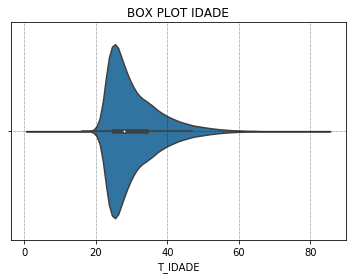

In [96]:
sns.violinplot(x=df["T_IDADE"])
plt.title("BOX PLOT IDADE")
plt.grid(color="black",linestyle=":", linewidth=0.5)
#aplicando o conceito de box plot para verificar possíveis Outliers ma variável idade.

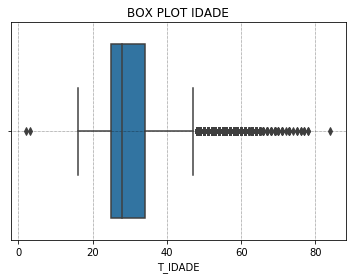

In [194]:
sns.boxplot(x=df["T_IDADE"])
plt.title("BOX PLOT IDADE")
plt.grid(color="black",linestyle=":", linewidth=0.5)

In [97]:
df.columns

Index(['COD_ALUNO', 'COD_UNIDADE', 'COD_TURMA', 'SEXO', 'ESTADO_CIVIL',
       'DATA_NASCIMENTO', 'CIDADE_ALUNO', 'UF_ALUNO', 'CEP_ALUNO', 'COD_CURSO',
       'NOME_CURSO', 'TURNO_CURSO', 'DURACAO_CURSO', 'SITUCAO_MATRICULA',
       'DATA_CONCLUSAO', 'PERIODOS_TRANCADOS', 'CH_TOTAL_MATRIZ',
       'NR_TOTAL_DISCIPLINAS', 'CH_APROVADA', 'NR_DISC_APROVADA', 'T_IDADE',
       'NOTA', 'NOTA_ENEM', 'POSSUI_ENEM', 'NRO_REPRO_ACO', 'NRO_TOTAL_REPRO',
       'NRO_REPRO_NORMAL', 'SEMESTRES_CURSADOS', 'POSSUI_FIES', 'NOVA_COLUNA'],
      dtype='object')

In [98]:
plt.figure(figsize=(14,7))
df.corr()['NOVA_COLUNA'].sort_values(ascending = False)

NOVA_COLUNA             1.000
NOTA                    0.169
NOTA_ENEM               0.096
POSSUI_ENEM             0.093
COD_CURSO               0.080
COD_UNIDADE             0.062
SEXO                    0.047
DURACAO_CURSO           0.027
NR_DISC_APROVADA        0.026
NR_TOTAL_DISCIPLINAS    0.025
CH_APROVADA            -0.010
CH_TOTAL_MATRIZ        -0.012
COD_ALUNO              -0.054
TURNO_CURSO            -0.058
NRO_REPRO_ACO          -0.098
T_IDADE                -0.125
PERIODOS_TRANCADOS     -0.150
NRO_TOTAL_REPRO        -0.166
NRO_REPRO_NORMAL       -0.255
SEMESTRES_CURSADOS     -0.417
Name: NOVA_COLUNA, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [200]:
df = df.drop(columns = ['ESTADO_CIVIL','NOME_CURSO','POSSUI_FIES','COD_ALUNO','COD_TURMA','COD_UNIDADE','CIDADE_ALUNO','UF_ALUNO','DATA_NASCIMENTO','CEP_ALUNO','COD_CURSO','SITUCAO_MATRICULA','DATA_CONCLUSAO'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68790 entries, 0 to 68825
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEXO                  68790 non-null  int64  
 1   TURNO_CURSO           68790 non-null  int64  
 2   DURACAO_CURSO         68790 non-null  int64  
 3   PERIODOS_TRANCADOS    68790 non-null  int64  
 4   CH_TOTAL_MATRIZ       68790 non-null  int64  
 5   NR_TOTAL_DISCIPLINAS  68790 non-null  int64  
 6   CH_APROVADA           68790 non-null  int64  
 7   NR_DISC_APROVADA      68790 non-null  int64  
 8   T_IDADE               68790 non-null  int64  
 9   NOTA                  68790 non-null  float64
 10  NOTA_ENEM             68790 non-null  float64
 11  POSSUI_ENEM           68790 non-null  int64  
 12  NRO_REPRO_ACO         68790 non-null  float64
 13  NRO_TOTAL_REPRO       68790 non-null  float64
 14  NRO_REPRO_NORMAL      68790 non-null  float64
 15  SEMESTRES_CURSADOS 

In [235]:
X = df.drop(columns = ['NOVA_COLUNA'])
y = df['NOVA_COLUNA'].values

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [210]:
lista=['SEXO', 'TURNO_CURSO', 'DURACAO_CURSO', 'PERIODOS_TRANCADOS',
       'CH_TOTAL_MATRIZ', 'NR_TOTAL_DISCIPLINAS', 'CH_APROVADA',
       'NR_DISC_APROVADA', 'T_IDADE', 'NOTA', 'NOTA_ENEM', 'POSSUI_ENEM',
       'NRO_REPRO_ACO', 'NRO_TOTAL_REPRO', 'NRO_REPRO_NORMAL',
       'SEMESTRES_CURSADOS', 'NOVA_COLUNA', 'ESTADO_CIVIL_cat']
for coluna in lista:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

In [234]:
df['ESTADO_CIVIL_cat'].unique()

array([6, 0, 1, 8, 7, 4, 3, 2, 5])

In [237]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.774821921790958


In [238]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.5780879003731162


### Fazendo escolhas de colunas que podem interferir no atraso para conclusão do curso

# COLUNAS EXCLUÍDAS
1)COD_UNIDADE e COD_TURMA: Essas duas variáveis podem ser utilizadas em estudos futuros, para investigar, por exemplo, por que "tal" unidade tem menos alunos com atraso na conclusão do curso?

2)DATA_NASCIMENTO: mostra excesso de informação, visto que existe uma coluna com idade.

3)CIDADE_ALUNO, UF_ALUNO e CEP_ALUNO: ambas informações podem ser usadas em conjunto com o item ') para investigar quais condições da cidade ou estado favorem ou não para a conclusão sem atraso.

4)COD_CURSO: pode ser excluida devido a utilização da coluna "NOME_CURSO", informações redundantes.

5)SITUACAO_MATRICULA: uma coluna que mostra que todos estão formados, ou seja, nao acrescenta em nada para a análise.

6)DATA_CONCLUSÃO: Não existe uma coluna "INICIO_CURSO" para comparação, ou seja, a data de conclusão não pode ser usada para analise de atraso, visto que não se sabe a data do inicio do curso.

7)CH_TOTAL_MATRIZ, NR_TOTAL_DISCIPLINAS, CH_APROVADA e NR_DISC_APROVADA: São colunas que não fornecem comparações, visto que as informações contidas nela não elucida se o aluno foi ou não reprovado em alguma discilplina e consequentemente atrasando o curso.

8)COD_ALUNO: Identificador único para cada alunos, sem número inteiro, ele pode atrapalhar os modelos.

9)ESTADO_CIVIL: o estado civil do estudante interefere na conclusão ou não do curso no tempo correto?

10)NOME_CURSO: Quais cursos tem o maior indice de reprovação? O que deve ser feito para sanar essa situação?

11)NRO_REPRO_ACO, NRO_TOTAL_REPRO, NRO_REPRO_NORMAL: Comparar as reprovações é intuitivo para saber se concluiu ou nao no tempo estipulado.

12)POSSUI_FIES: Alunos que possuem financiamento estudantil tende a ser mais aplicados? Isto é, terminam o curso no tempo estipulado?

# COLUNAS ESCOLHIDAS

1)SEXO: o genêro interfere na conclusão ou não do curso no tempo correto?

2)TURNO_CURSO: Os alunos que estudam a noite reprovam mais? Alunos de tempo integral? São perguntas que esperamos que o modelo responda.

3)DURACAO_CURSO e SEMESTRES_CURSADOS: são as duas colunas chaves para a analise dos dados, visto que se a diferente entre seus itens forem maiores que 1, mostra que o aluno terminou o curso com atraso.

4)PERIODOS_TRANCADOS: é intuitivo imaginar que se o aluno trancar o curso, ele não vai conseguir cumprir o curso nos semestres propostos.

5)T_IDADE: qual a importância da idade na conclusão ou não do curso no tempo estipulado?

6)NOTA: Notas boas são fatores predominantes para o aluno concluir no temopo estipulado o curso?

7)NOTA_ENEM e POSSUI_ENEM: são variáveis que podem ser usadas para, por exemplo, investigar se alunos que possuem notas acima de "x" tem mais chances de concluir o curso no tempo estipulado.



### AS ESCOLHAS PARA APLICAÇÃO DOS MODELOS FOI FEITA PARA OTIMIZAR O TEMPO, VISTO QUE, SERIA NECESSÁRIO MAIS TRATAMENTOS NOS DADOS FORNECIDOS PARA MELHORAR O MODELO.





In [33]:
pri_trat=df[['SEXO', 'TURNO_CURSO', 'DURACAO_CURSO', 'PERIODOS_TRANCADOS', 'T_IDADE',
       'NOTA', 'SEMESTRES_CURSADOS','NOVA_COLUNA']]
#escolha das variáveis pertinentes para o  estudo de caso.

In [34]:
pri_trat

,SEXO,TURNO_CURSO,DURACAO_CURSO,PERIODOS_TRANCADOS,T_IDADE,NOTA,SEMESTRES_CURSADOS,NOVA_COLUNA
0,2,3,4,0,21,8.711111,4,1.0
1,2,0,4,0,21,8.140000,4,1.0
2,2,0,4,0,67,8.510000,4,1.0
3,2,0,4,0,36,8.456667,4,1.0
4,1,3,8,0,37,7.624490,14,0.0
...,...,...,...,...,...,...,...,...
68821,2,3,8,0,27,7.551020,12,0.0
68822,2,3,4,0,28,7.683333,6,0.0
68823,1,3,8,0,24,7.911321,10,0.0
68824,2,3,4,0,23,8.637037,4,1.0


In [35]:
pri_trat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68790 entries, 0 to 68825
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SEXO                68790 non-null  int64  
 1   TURNO_CURSO         68790 non-null  int64  
 2   DURACAO_CURSO       68790 non-null  int64  
 3   PERIODOS_TRANCADOS  68790 non-null  int64  
 4   T_IDADE             68790 non-null  int64  
 5   NOTA                68790 non-null  float64
 6   SEMESTRES_CURSADOS  68790 non-null  int64  
 7   NOVA_COLUNA         68790 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 4.7 MB


In [227]:
#num_cols = ["NOTA", 'T_IDADE']

In [228]:
#df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),columns=num_cols)

In [241]:
#df_std

In [233]:
#pri_trat["NOTA"]=df_std["NOTA"]
#pri_trat["T_IDADE"]=df_std["T_IDADE"]

In [36]:
pri_trat

,SEXO,TURNO_CURSO,DURACAO_CURSO,PERIODOS_TRANCADOS,T_IDADE,NOTA,SEMESTRES_CURSADOS,NOVA_COLUNA
0,2,3,4,0,21,8.711111,4,1.0
1,2,0,4,0,21,8.140000,4,1.0
2,2,0,4,0,67,8.510000,4,1.0
3,2,0,4,0,36,8.456667,4,1.0
4,1,3,8,0,37,7.624490,14,0.0
...,...,...,...,...,...,...,...,...
68821,2,3,8,0,27,7.551020,12,0.0
68822,2,3,4,0,28,7.683333,6,0.0
68823,1,3,8,0,24,7.911321,10,0.0
68824,2,3,4,0,23,8.637037,4,1.0


# PROCESSAMENTO

In [37]:
df=pri_trat
X = df.drop(columns = ['NOVA_COLUNA'])
y = df['NOVA_COLUNA'].values

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40, stratify=y)

# KNN

In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.9974560255851141


In [51]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7758
         1.0       1.00      1.00      1.00      6000

    accuracy                           1.00     13758
   macro avg       1.00      1.00      1.00     13758
weighted avg       1.00      1.00      1.00     13758



# svc 

In [52]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 1.0


In [53]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7758
         1.0       1.00      1.00      1.00      6000

    accuracy                           1.00     13758
   macro avg       1.00      1.00      1.00     13758
weighted avg       1.00      1.00      1.00     13758



# RANDON FOREST


In [54]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9912051170228231


In [55]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      7758
         1.0       1.00      0.98      0.99      6000

    accuracy                           0.99     13758
   macro avg       0.99      0.99      0.99     13758
weighted avg       0.99      0.99      0.99     13758



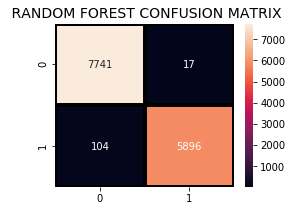

In [56]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

In [57]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 1.0


In [58]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7758
         1.0       1.00      1.00      1.00      6000

    accuracy                           1.00     13758
   macro avg       1.00      1.00      1.00     13758
weighted avg       1.00      1.00      1.00     13758



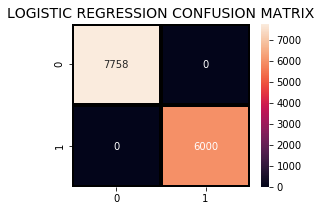

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()